# Intrusion Detection System

## Data Loading

In [57]:
import numpy as np
import pandas as pd

def load_data(file_path):
    '''Fuction to load csv data file as dataframe from given file path'''
    df = pd.read_csv(file_path, sep='*')
    return df

df = load_data('data/data.csv')
print('Shape of data: ', df.shape)
df.head()

Shape of data:  (151562, 24)


<ipython-input-57-6fa85102edf1>:9: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  df = load_data('data/data.csv')


,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.mactime,radiotap.datarate,...,wlan.fc.ds,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.duration,wlan.frag,wlan.seq,class
0,1.634038e+09,0.000000,0.000000,0.000000,63,63,12,0,NaN,1.0,...,0x00000000,0,0,0,0,0,314,0.0,3.0,AssociationRequest
1,1.634038e+09,0.019974,0.019974,0.019974,64,64,13,0,NaN,1.0,...,0x00000000,0,0,0,0,0,314,0.0,3.0,AssociationRequest
2,1.634038e+09,3.007324,3.007324,3.027298,63,63,12,0,NaN,1.0,...,0x00000000,0,0,0,0,0,314,0.0,9.0,AssociationRequest
3,1.634038e+09,0.019238,0.019238,3.046537,64,64,13,0,NaN,1.0,...,0x00000000,0,0,0,0,0,314,0.0,9.0,AssociationRequest
4,1.634038e+09,3.009314,3.009314,6.055851,63,63,12,0,NaN,1.0,...,0x00000000,0,0,0,0,0,314,0.0,15.0,AssociationRequest


## Exploratory Data Analysis

In [58]:
df.describe()

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,...,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.duration,wlan.frag,wlan.seq
count,1.515620e+05,151562.000000,151562.000000,151562.000000,151562.000000,151562.000000,151562.000000,2.249600e+04,151562.000000,22496.000000,...,151562.000000,151562.000000,151562.0,151562.000000,151562.000000,151562.000000,151562.000000,151562.000000,141432.0,141432.000000
mean,1.634036e+09,0.009931,0.009931,178.259924,77.281060,77.281060,15.825246,3.566134e+09,3.774648,2457.133579,...,0.139705,11.462926,0.0,0.045829,0.002164,0.000092,0.027619,326.673559,0.0,1941.480358
std,1.081933e+03,0.268500,0.268500,123.109746,204.288171,204.288171,8.042620,2.708722e+08,10.092657,13.723565,...,0.439382,1.977300,0.0,0.209116,0.046470,0.009611,0.163879,349.048201,0.0,1220.419114
min,1.634035e+09,-0.000027,-0.000027,0.000000,38.000000,38.000000,12.000000,2.889593e+09,1.000000,2412.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.634035e+09,0.000386,0.000386,67.000854,38.000000,38.000000,12.000000,3.654586e+09,1.000000,2462.000000,...,0.000000,12.000000,0.0,0.000000,0.000000,0.000000,0.000000,314.000000,0.0,838.000000
50%,1.634035e+09,0.001330,0.001330,195.461701,39.000000,39.000000,13.000000,3.715680e+09,1.000000,2462.000000,...,0.000000,12.000000,0.0,0.000000,0.000000,0.000000,0.000000,314.000000,0.0,1919.000000
75%,1.634036e+09,0.002021,0.002021,271.433268,39.000000,39.000000,13.000000,3.733304e+09,1.000000,2462.000000,...,0.000000,12.000000,0.0,0.000000,0.000000,0.000000,0.000000,314.000000,0.0,2998.000000
max,1.634039e+09,75.208453,75.208453,394.585680,1593.000000,1593.000000,39.000000,3.739052e+09,72.222200,2462.000000,...,2.000000,13.000000,0.0,1.000000,1.000000,1.000000,1.000000,5384.000000,0.0,4095.000000


### Class Distribution

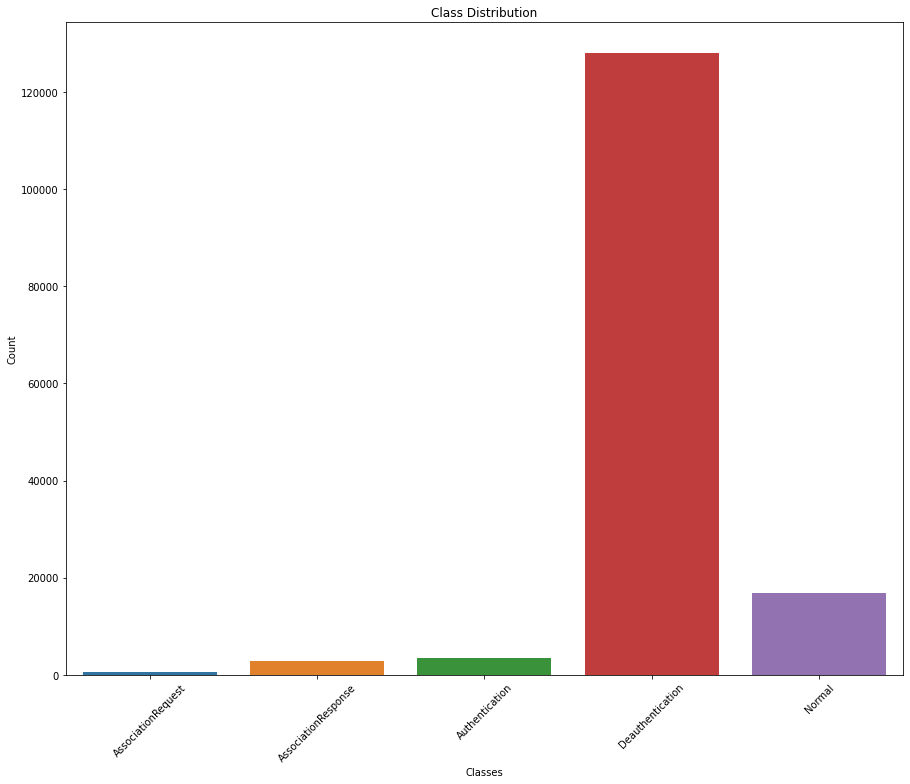

{'AssociationRequest': 533, 'AssociationResponse': 2766, 'Authentication': 3385, 'Deauthentication': 128000, 'Normal': 16878}


In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

def class_distrib(df):
    '''This function displays class distribution as a bar plot for the given dataframe'''
    unique, counts = np.unique(df['class'], return_counts=True)
    distrib = dict(zip(unique, counts))

    plt.figure(figsize=(15, 12))
    sns.barplot(x=list(distrib.keys()), y=list(distrib.values()))
    plt.title("Class Distribution")
    plt.xticks(rotation=45)
    plt.xlabel("Classes")
    plt.ylabel("Count")

    plt.show()
    print(distrib)
    
class_distrib(df)

- This is unbalanced data, we need to downsample the majority class

### Down Sampling majority class

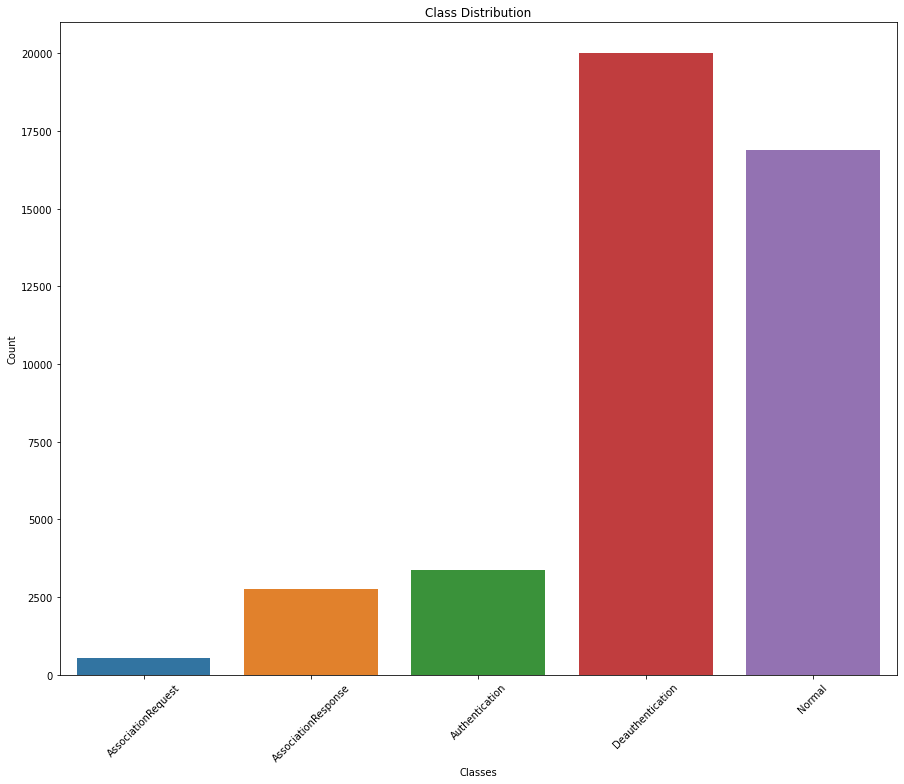

{'AssociationRequest': 533, 'AssociationResponse': 2766, 'Authentication': 3385, 'Deauthentication': 20000, 'Normal': 16878}


In [60]:
def down_sample(df, class_name, n):
    '''This function extracts n samples from the given dataframe for the given input class'''
    df_maj = df[df['class'] == class_name]
    df = df[df['class'] != class_name]

    df_maj = df_maj.sample(n=n, random_state=420)

    df = pd.concat([df_maj, df], axis=0)
    
    df.sample(frac=1, random_state=420)

    return df

df = down_sample(df, 'Deauthentication', 20000)

class_distrib(df)

### Shallow cleaning

In [61]:
df = df.replace('?', np.NaN)
# Rows which still have some NaN value 
df_nan_rows = df[df.isnull().any(axis=1)]
print('All class rows which still have some NaN value: ', len(df_nan_rows))

df_nan_rows_normal = df[df.isnull().any(axis=1)][df['class'] == 'normal']
print('Normal class rows which still have some NaN value: ', len(df_nan_rows_normal))

All class rows which still have some NaN value:  31196
Normal class rows which still have some NaN value:  0


<ipython-input-61-a94b3de18fc7>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nan_rows_normal = df[df.isnull().any(axis=1)][df['class'] == 'normal']


In [62]:
def shallow_clean(df):
    '''Cleans the the given dataframe at a shallow level'''
    # Remove columns with >= 85% NaNs
    thres_limit = len(df) * 0.25
    df = df.dropna(thresh=int(thres_limit), axis=1)

    # Remove columns with constant value
    df = df.drop(columns=df.columns[df.nunique()==1])

    # Remove rows with >= 50% NaNs
    thres_limit = df.shape[1] * 0.50
    df = df.dropna(thresh=int(thres_limit), axis=0)
    
    return df

cols_before = set(df.columns)
df = shallow_clean(df)
cols_after = set(df.columns)
print('Columns removed:', cols_before - cols_after)

Columns removed: {'wlan.fc.frag', 'wlan.frag'}


In [63]:
df.isna().any()

frame.time_epoch              False
frame.time_delta              False
frame.time_delta_displayed    False
frame.time_relative           False
frame.len                     False
frame.cap_len                 False
radiotap.length               False
radiotap.present.tsft         False
radiotap.mactime               True
radiotap.datarate             False
radiotap.channel.freq          True
wlan.fc.type_subtype          False
wlan.fc.type                  False
wlan.fc.subtype               False
wlan.fc.ds                    False
wlan.fc.retry                 False
wlan.fc.pwrmgt                False
wlan.fc.moredata              False
wlan.fc.protected             False
wlan.duration                 False
wlan.seq                       True
class                         False
dtype: bool

In [64]:
df.dtypes

frame.time_epoch              float64
frame.time_delta              float64
frame.time_delta_displayed    float64
frame.time_relative           float64
frame.len                       int64
frame.cap_len                   int64
radiotap.length                 int64
radiotap.present.tsft          object
radiotap.mactime              float64
radiotap.datarate             float64
radiotap.channel.freq         float64
wlan.fc.type_subtype            int64
wlan.fc.type                    int64
wlan.fc.subtype                 int64
wlan.fc.ds                     object
wlan.fc.retry                   int64
wlan.fc.pwrmgt                  int64
wlan.fc.moredata                int64
wlan.fc.protected               int64
wlan.duration                   int64
wlan.seq                      float64
class                          object
dtype: object

## Pre-processing

### Replace NaNs with 0

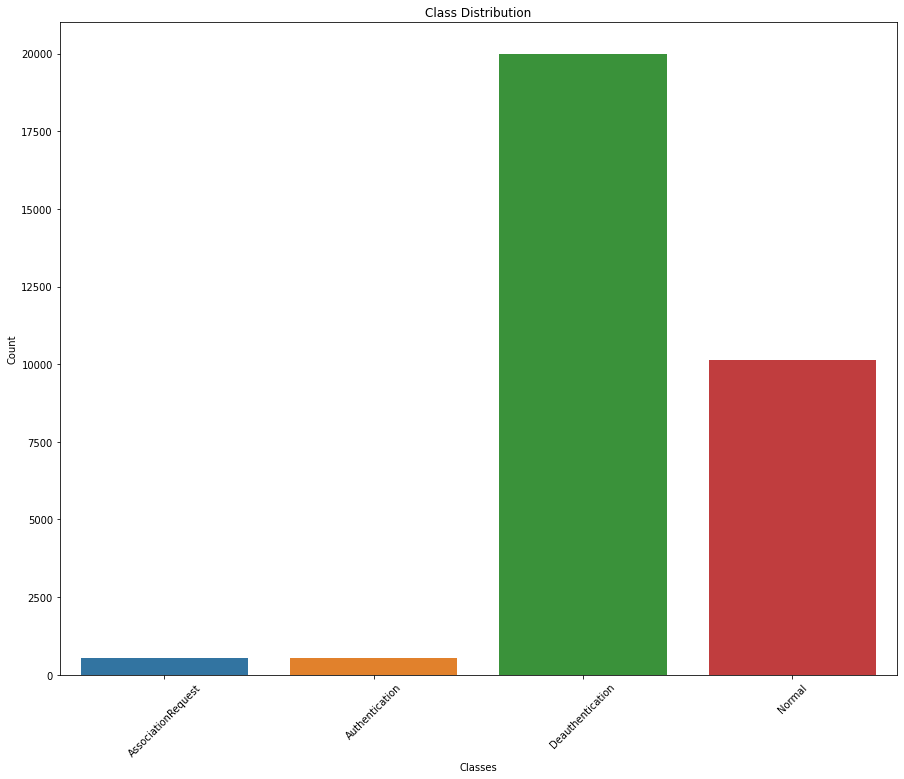

{'AssociationRequest': 532, 'Authentication': 534, 'Deauthentication': 20000, 'Normal': 10130}


In [65]:
class_distrib(df_nan_rows)

In [66]:
#Fill the NULL values
num_nan_cols = ['radiotap.mactime', 'radiotap.datarate', 'wlan.seq', 'radiotap.channel.freq', 'wlan.frag', 'wlan.duration']

for c in num_nan_cols:
    try:
        df[c].fillna(value=0, inplace=True)
    except:
        continue
    
df.columns[df.isna().any()].tolist()

[]

### Analyzing object type data

In [67]:
object_cols = list(df.select_dtypes(['object']))
print('Unique category counts: ')
for c in object_cols:
    print(c, '=>', df[c].value_counts().count())

Unique category counts: 
radiotap.present.tsft => 4
wlan.fc.ds => 3
class => 5


In [68]:
# Save processed data to file
df.to_csv('data/train_processed.csv', index=False)

In [69]:
# Load processed data to df
# df = pd.read_csv('data/train_processed_1.csv')

### Standardizing

In [79]:
X = df.drop(['class'], axis=1)
y = df['class']

In [80]:
from sklearn.preprocessing import StandardScaler
import joblib

std_cols = ['frame.time_epoch', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_relative', 'frame.len',
           'frame.cap_len', 'radiotap.length', 'radiotap.mactime', 'radiotap.datarate', 'radiotap.channel.freq',
           'wlan.duration', 'wlan.seq']
with open('scaler_save/columns.txt', 'w') as f:
    [f.write(c+'\n') for c in std_cols]

standard_scaler = StandardScaler()
X[std_cols] = standard_scaler.fit_transform(X[std_cols])

# Save this scalar to file
joblib.dump(standard_scaler, 'scaler_save/scaler.gz')

['scaler_save/scaler.gz']

### One-hot encoding (BoW)

In [84]:
from sklearn.preprocessing import OneHotEncoder

enc_cols = ['wlan.fc.type_subtype', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'radiotap.present.tsft',
            'radiotap.channel.freq', 'wlan.frag']

with open('encoder_save/columns.txt', 'w') as f:
    [f.write(c+'\n') for c in enc_cols]
    
oh_encoder_x = OneHotEncoder(sparse=False, handle_unknown='ignore')
array_ohe = oh_encoder_x.fit_transform(X[enc_cols].astype(str))
df_ohe = pd.DataFrame(array_ohe, index=df.index)

#Extract only the columns that didnt need to be encoded
df_other = X.drop(columns=enc_cols)

#Concatenate the two dataframes : 
X = pd.concat([df_ohe, df_other], axis=1)

# Save this encoder to file
joblib.dump(oh_encoder_x, 'encoder_save/encoder_x.gz')

['encoder_save/encoder_x.gz']

In [85]:
print('Shape of y before encoding: ', y.shape)
print('ReShape of y for encoding: ', y.values.reshape(-1, 1).shape)

oh_encoder_y = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_categorical = oh_encoder_y.fit_transform(y.values.reshape(-1, 1))
joblib.dump(oh_encoder_y, 'encoder_save/encoder_y.gz')
print('Shape of y after encoding: ', y_categorical.shape)

Shape of y before encoding:  (43562,)
ReShape of y for encoding:  (43562, 1)
Shape of y after encoding:  (43562, 5)


In [86]:
df.shape, X.shape, y.shape, y_categorical.shape

((43562, 22), (43562, 18), (43562,), (43562, 5))

### Test train split

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.33, stratify=y)

### Write relevant features to file

In [88]:
relevant_columns = df.columns
with open('data/relevant_columns.txt', 'w') as f:
    [f.write(rc+'\n') for rc in relevant_columns]

### Writing class labels to file

In [89]:
class_labels = oh_encoder_y.categories_[0]
with open('data/class_labels.txt', 'w') as f:
    [f.write(cl+'\n') for cl in class_labels]

## Deep Learning Model

### Model definition

In [90]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def create_model(input_shape, n_class):
    """This function creates a simple DL model"""
    input_layer = tf.keras.Input(shape=(input_shape,))
    
    dense_layer1 = layers.Dense(16, activation='relu')(input_layer)
    dense_layer2 = layers.Dense(32, activation='relu')(dense_layer1)
    dense_layer3 = layers.Dense(32, activation='relu')(dense_layer2)
    
    output_layer = layers.Dense(n_class, activation='softmax')(dense_layer3)
    return Model(input_layer, output_layer)
    
model = create_model(X_train.shape[1], y_categorical.shape[1])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                304       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 165       
Total params: 2,069
Trainable params: 2,069
Non-trainable params: 0
_________________________________________________________________


### Setting model optimizers and callbacks

In [91]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
%load_ext tensorboard

log_dir="tensorboard\\logs"
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

checkpoint = ModelCheckpoint(filepath='model_save/best_model.h5', monitor='val_accuracy',
                             verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=4, verbose=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Model training

In [93]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),
              batch_size=128, callbacks=[checkpoint, earlystop, tensorboard])

Epoch 1/10
229/229 [==============================] - 2s 8ms/step - loss: 0.4893 - accuracy: 0.8894 - val_loss: 0.0382 - val_accuracy: 0.9878

Epoch 00001: val_accuracy improved from -inf to 0.98776, saving model to model_save\best_model.h5
Epoch 2/10
229/229 [==============================] - 1s 4ms/step - loss: 0.0160 - accuracy: 0.9973 - val_loss: 0.0034 - val_accuracy: 1.0000

Epoch 00002: val_accuracy improved from 0.98776 to 1.00000, saving model to model_save\best_model.h5
Epoch 3/10
229/229 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 7.4226e-04 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/10
229/229 [==============================] - 1s 5ms/step - loss: 4.8049e-04 - accuracy: 1.0000 - val_loss: 3.1391e-04 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/10
229/229 [==============================] - 1s 4ms/step - loss: 2.2639e-04 - accuracy: 1.0000 - v

### Model performance

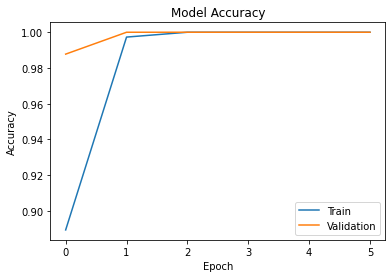

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Model results

In [95]:
from sklearn.metrics import confusion_matrix, classification_report

y_preds_val = np.argmax(model.predict(X_val), axis=1)
y_val = np.argmax(y_val, axis=1)
y_preds_train = np.argmax(model.predict(X_train), axis=1)
y_train = np.argmax(y_train, axis=1)

with open('data/class_labels.txt', 'r') as f:
    class_labels = np.array([line.strip() for line in f])

cm_val = confusion_matrix(class_labels[y_val], class_labels[y_preds_val])
cm_train = confusion_matrix(class_labels[y_train], class_labels[y_preds_train])

df_cm_val = pd.DataFrame(cm_val, columns=class_labels, index=class_labels)
df_cm_train = pd.DataFrame(cm_train, columns=class_labels, index=class_labels)
df_cm_val.index.name = df_cm_train.index.name = 'Actual'
df_cm_val.columns.name = df_cm_train.columns.name = 'Predicted'

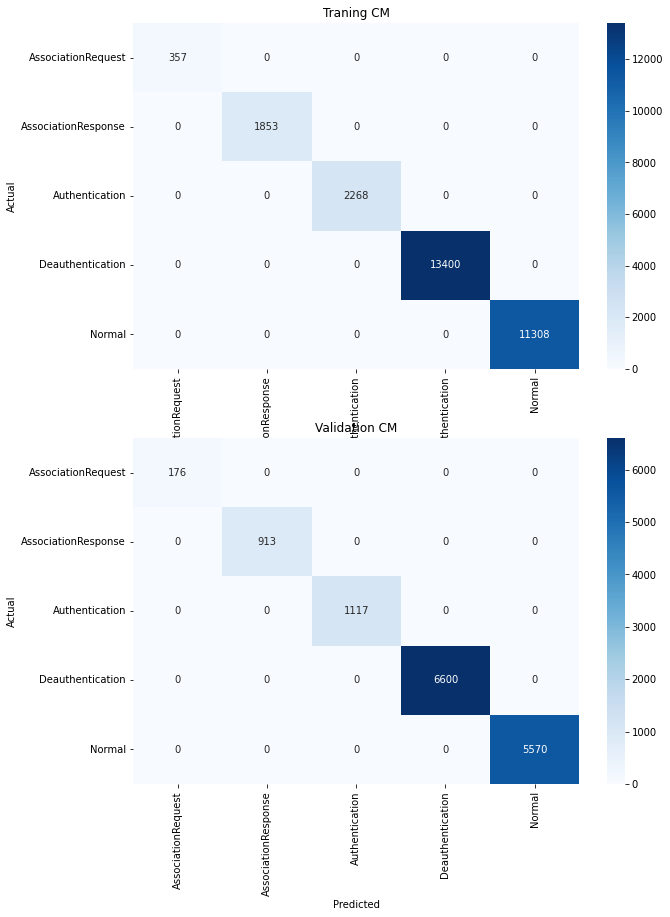

In [96]:
fig = plt.figure(figsize = (10, 14))

fig.add_subplot(2, 1, 1)
sp2 = sns.heatmap(df_cm_train, cmap="Blues", annot=True, fmt='g')
sp2.set_title('Traning CM')

fig.add_subplot(2, 1, 2)
sp1 = sns.heatmap(df_cm_val, cmap="Blues", annot=True, fmt='g')
sp1.set_title('Validation CM')

plt.show()

In [51]:
print(classification_report(class_labels[y_val], class_labels[y_preds_val], target_names=list(class_labels)))

                     precision    recall  f1-score   support

 AssociationRequest       1.00      0.99      1.00       176
AssociationResponse       1.00      1.00      1.00       913
     Authentication       1.00      1.00      1.00      1117
   Deauthentication       1.00      1.00      1.00      6600
             Normal       1.00      1.00      1.00      5570

           accuracy                           1.00     14376
          macro avg       1.00      1.00      1.00     14376
       weighted avg       1.00      1.00      1.00     14376

